<a href="https://colab.research.google.com/github/locpham21/finalproject3I/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import zipfile
import os

# Đường dẫn đến file zip
zip_path = "/content/drive-download-20250420T074338Z-001.zip"

# Thư mục đích để giải nén
extract_dir = "dataset1"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


original_dataset = "dataset1"
clean_dataset = "clean_dataset1"

# Tạo thư mục mới để chứa dữ liệu đã làm sạch
os.makedirs(clean_dataset, exist_ok=True)

# Duyệt qua từng người
for person_name in os.listdir(original_dataset):
    person_path = os.path.join(original_dataset, person_name)
    if not os.path.isdir(person_path):
        continue

    # Duyệt qua cảm xúc: Vui, WOW...
    for emotion in os.listdir(person_path):
        emotion_path = os.path.join(person_path, emotion)
        if not os.path.isdir(emotion_path):
            continue


        target_emotion_path = os.path.join(clean_dataset, emotion)
        os.makedirs(target_emotion_path, exist_ok=True)

        # Duyệt ảnh và đổi tên
        for i, filename in enumerate(os.listdir(emotion_path)):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                old_path = os.path.join(emotion_path, filename)


                clean_name = person_name.replace(" ", "_")
                new_filename = f"{clean_name}_{i}.jpg"
                new_path = os.path.join(target_emotion_path, new_filename)

                shutil.copyfile(old_path, new_path)

print("✅ Đã chuẩn hóa dữ liệu xong tại thư mục 'clean_dataset1/'")

✅ Đã chuẩn hóa dữ liệu xong tại thư mục 'clean_dataset1/'


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tạo data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    'clean_dataset1',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'clean_dataset1',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Xây dựng mô hình CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(train_data, epochs=10, validation_data=val_data)

# Lưu mô hình nếu cần
model.save("emotion_cnn_model11.h5")

Found 317 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.3775 - loss: 1.9283 - val_accuracy: 0.2949 - val_loss: 1.2219
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.6638 - loss: 0.8561 - val_accuracy: 0.3590 - val_loss: 1.6533
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.8718 - loss: 0.4665 - val_accuracy: 0.3846 - val_loss: 1.2455
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9226 - loss: 0.2265 - val_accuracy: 0.5385 - val_loss: 1.3070
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9180 - loss: 0.1779 - val_accuracy: 0.5769 - val_loss: 1.7711
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.9536 - loss: 0.0977 - val_accuracy: 0.5641 - val_loss: 1.7092
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9606 - loss: 0.0744 - val_accuracy: 0.5385 - val_loss: 2.6154
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Cảm xúc: Khóc, Tên: Chí Kiên


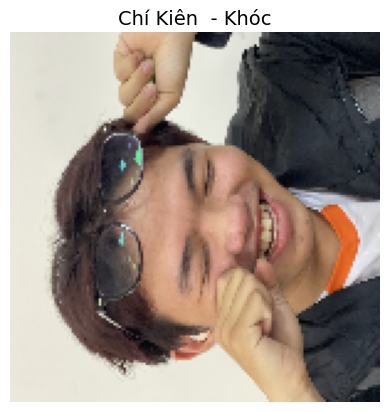

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Cảm xúc: Khó chịu, Tên: Lê Quang Trường


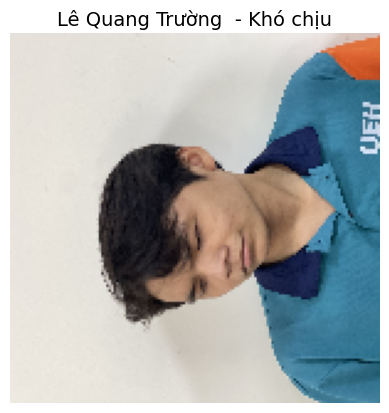

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Cảm xúc: Vui, Tên: Pham Tran Xuan Loc


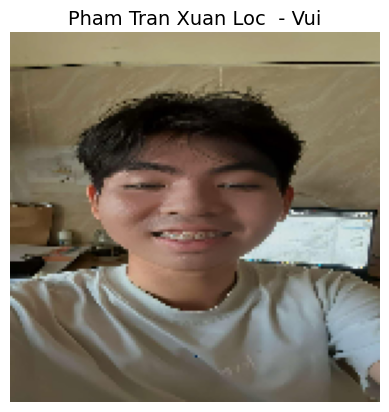

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Cảm xúc: WOW, Tên: Hòn Huu


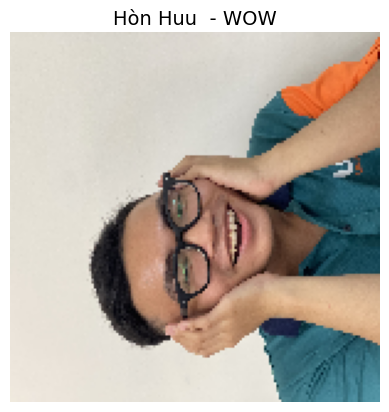

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Cảm xúc: Vui, Tên: IMG


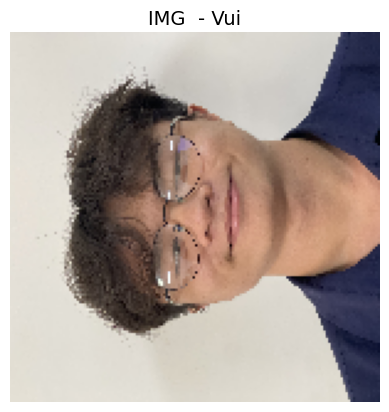

In [33]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# Load mô hình
model = tf.keras.models.load_model("emotion_cnn_model11.h5")

# Lấy nhãn cảm xúc
class_labels = train_data.class_indices
label_map = {v: k for k, v in class_labels.items()}

# Hàm dự đoán + hiển thị ảnh
def predict_emotion(image_path):
    # Load ảnh và xử lý
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_array_exp)
    predicted_index = np.argmax(prediction)
    predicted_emotion = label_map[predicted_index]

    # Trích xuất Tên tu tên file
    filename = os.path.basename(image_path)
    filename_wo_ext = os.path.splitext(filename)[0]
    parts = filename_wo_ext.rsplit("_", 1)

    name = parts[0].replace("_", " ")


    # In kết quả
    print(f"Cảm xúc: {predicted_emotion}, Tên: {name}")

    # Hiển thị ảnh
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"{name}  - {predicted_emotion}", fontsize=14)
    plt.show()

# === Ví dụ sử dụng ===
predict_emotion("/content/clean_dataset1/Khóc/Chí_Kiên_13.jpg")
predict_emotion("/content/clean_dataset/Khó chịu/Lê_Quang_Trường_0.jpg")
predict_emotion("/content/Pham Tran Xuan Loc.jpg")
predict_emotion("/content/clean_dataset1/WOW/Hòn_Huu_6.jpg")
predict_emotion("/content/dataset1/Lê Ngọc Hào/Vui/IMG_2613.JPG")
